# Logisitic Map Equation and Chaos Theory
###### Created by Kai Weterings, 11/08/2023
Welcome to a short overview of chaos theory, an area of mathematics and the physical sciences which displays the sensitivity of certain dynamic systems to initial conditions.   
In addition, it describes determinisic systems which show chaotic behaviour, a type of behaviour which does not display patterns when slightly changing initial conditions will exhibit a greatly differed outcome. It is important to note that random and chaotic are very different. A random system is one that will have changed outcomes with the same initial conditions. However a chaotic system is still deterministic; if the initial conditions are exactly the same, the outcome will be the exact same, but it is very difficult to predict the behaviour of a chaotic system based on the knowledge of other outcomes.  
This field has found great importance due to the fact that many systems in the world (nature, stock markets, etc...) behave chaoticly.  
The following notebook will explore the logistic map equation, often used to model population sizes and growths, and the presence of chaos outcomes given certain constraints.

The cell bellow is to import the necessary libraries and initialise certain settings for the code to work.

In [1]:
import sympy as sym
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

%matplotlib widget

In [2]:
x_n, x_n1, r = sym.symbols('x_n x_n+1 r')
log_map = sym.Eq(x_n1, r*x_n*(1 - x_n))     # Logistic map equation

Below you will find the logistic map equation mentioned previously;

In [3]:
log_map

Eq(x_n+1, r*x_n*(1 - x_n))

Where;
* $x_n$ is a fraction of the current population in terms of the maximum population.
* $x_n$ is a fraction of the new population in terms of the maximum population.
* $r$ is the growth rate.

In [4]:
#Defining a function to call for the logistic map equation
def f(x_n, r):
    return r*x_n*(1 - x_n)

The following couple of cells will be plotting the logistic map equation for various iterated versions of the function to compare the populations changes after iterating the equation however many times using initial population $x_0$. This will allow us to see whether the population manages to stabalise at a value like populations are supposed to or if the population will take chaotic/unpredictable values after various interations.  
We will be examining the effect of differing growth rate $r$ on the behaviour of the iterated instances of the logistic map equation (plotting $x_{n+1}$ against $x_n$).

In [5]:
def x_n_vs_x_n1(r, iterable, ax0, ax1):
    x0 = np.arange(0,1.01,0.01)
    x = np.arange(0,1.01,0.01)
    for _ in range(iterable):          # Creating various plots for each iterated instance of the logistic map equation
        ax[ax0,ax1].plot(x0, f(x, r))
        x = f(x, r)
    ax[ax0,ax1].set_title(f"r = {r}")  # Preparing for a (2,2) subplot figure for all r used

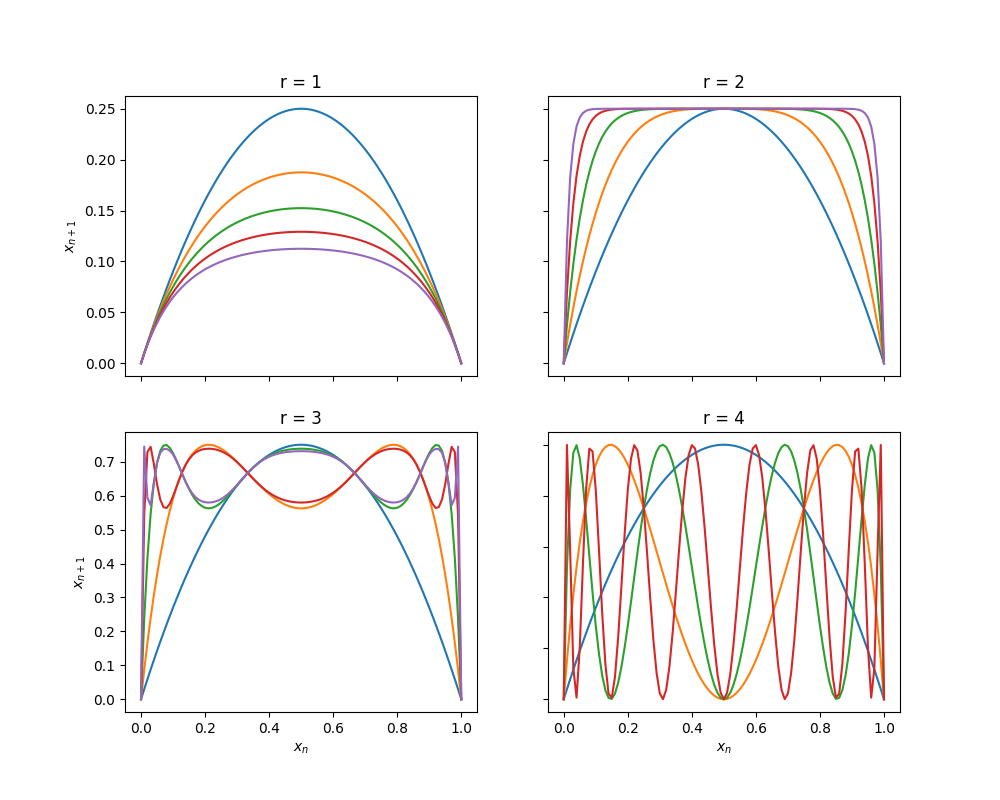

In [6]:
fig, ax = plt.subplots(2,2, figsize=(10,8), sharex=True)
x_n_vs_x_n1(1, 5, 0, 0)        # Plotting iterated versions for growths rates 1,2,3,4
x_n_vs_x_n1(2, 5, 0, 1)
x_n_vs_x_n1(3, 5, 1, 0)
x_n_vs_x_n1(4, 4, 1, 1)

for ax in ax.flat:             # Adding labels
    ax.set(xlabel='$x_n$', ylabel='$x_{n+1}$')
    ax.label_outer()

plt.savefig('x_n_vs_x_n1.png') # Saving the below plot as .png in the same project folder 
plt.show()

As you can see in the above figure, for growth rate $r$ = 1 and $r$ = 2 the population converges towards a value after various iterations: for $r$ = 1 it tends towards 0 and for $r$ = 2 it tends towards 0.5. However for $r$ = 3 and $r$ =  this is different. Looking at $r$ = 3 the various iterated versions tend towards 2 different values, hence the stabilised value for the populations bifurcates (more on this meaning later). Now looking at $r$ = 4, the iterated versions oscillate between varying values, hence the population may stabilise on various different values i.e. chaos. This shows that with slightly changed growth rates, the outcome of the stable population will change drastically. However, as chaos theory states, the pattern of various chaotic stable populations will be the same for each iteration of this code (calculation), however disordered unpredictable the outcome may seem.

Below we will be looking at how the initial conditions affect the outcome of the system. More specifically, how the populations vary after every time increment i.e. after every iteration of the logistic map equation.

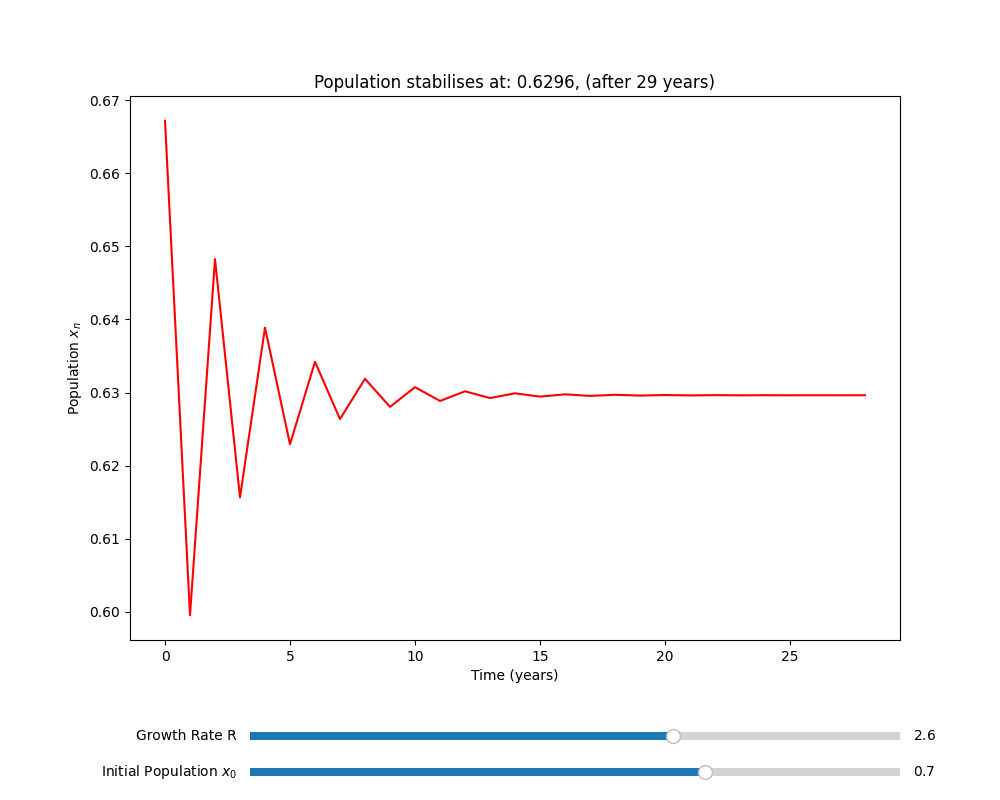

In [12]:
def g(ini_pop, r):                     # Function which generates the data for population against time graphs
    time = np.arange(0,10001,1)
    pop = []
    pop.append(f(ini_pop, r))
    if r >= 3:
        time = np.arange(0,61,1)
    for i in range(len(time)-1):
        pop.append(f(pop[i], r))
        if 0.99999 < pop[i]/pop[i-1] < 1.00001 or pop[-1] == 0:
            break
    return pop


ini_pop = rand.random()                # Initial conditions
r  = 2.7

time = np.arange(0,1001,1)
pop = g(ini_pop, r)                    # Generating first shown plot when graph is made

time = time[:len(pop)]                 # Adjusting size of time data for identical dimensions

fig, ax = plt.subplots(figsize=(10,8)) # Creating the plot using matplotlib, adding settings
plt.subplots_adjust(bottom = 0.2, left = 0.13)
line, = plt.plot(time, pop, color='red')
plt.ylabel('Population $x_n$')
plt.xlabel('Time (years)')
ax.set_title(f"Population stabilises at: {round(pop[-1], 4)}, (after {len(pop)} years)")

ax_r = plt.axes([0.25, 0.07, 0.65, 0.02]) # Creating slider for growth rate
r_factor = Slider(ax_r, 'Growth Rate R', valmin= 0, valmax= 4, valinit= 2.6, valstep= 0.05)

ax_ini_pop = plt.axes([0.25, 0.025, 0.65, 0.02]) # Creating slider for initial population
ini_pop_factor = Slider(ax_ini_pop, 'Initial Population $x_0$', valmin= 0, valmax= 1, valinit= 0.7, valstep= 0.01)

def update(val):                          # Update function for new plot when slider changes value
    data = g(ini_pop_factor.val, r_factor.val)
    line.set_ydata(data)
    line.set_xdata(np.arange(0,len(data),1))
    if r_factor.val < 3:
        ax.set_title(f"Population stabilises at: {round(data[-1], 4)}, (after {len(data)} years)")
    elif r_factor.val < 3.6:
        ax.set_title('The stable value is now bifurcated')
    else:
        ax.set_title('The stable value is now chaotic')

    ax.relim()                            # Updating axes limits for each new plot after slider movement
    ax.autoscale_view()
    
    fig.canvas.draw_idle()                # Redraw current figure

r_factor.on_changed(update)               # Call update() every time slider is moved
ini_pop_factor.on_changed(update)

plt.show()

From this slider graph, you can change each initial condition of each term in the logisitic map equation. The time increment is in years.

It can be seen that regardless of the initial population $x_0$, the population stabilises at the same value and it doesn't alter (given a constant growth rate $r$).  
However, for growth rates $r$ = 0 to $r$ = 1, the growth rate converges to 0, which is eveident since the population is not growing. Furthermore, from growth rates 1 $\leq$ $r$ $\lt$ 3 the population stabilises at a value and the larger the growth rate the larger stable population. Finally for growth rates $r$ $\geq$ 3, the population does not stabilise at any specific value. It will begin to stabilise between 2 values (oscilating between the 2 as can be seen on the graph) or for later $r$ values the population does not stabilise on values and oscillates between various values. The chaotic behaviour can be seen by the fact that if you slide the the initial condition away and back to the same value, the same pattern emerges. Hence even though, for later values of $r$ lead to a non-specific stable value of the population, but the fluctuations in the population will be the same. In other words, for later values of $r$ the population never stabilises.

Below is more evidence that the logistic map displays a chaotic system of population instead of random, using a bifurcation diagram.

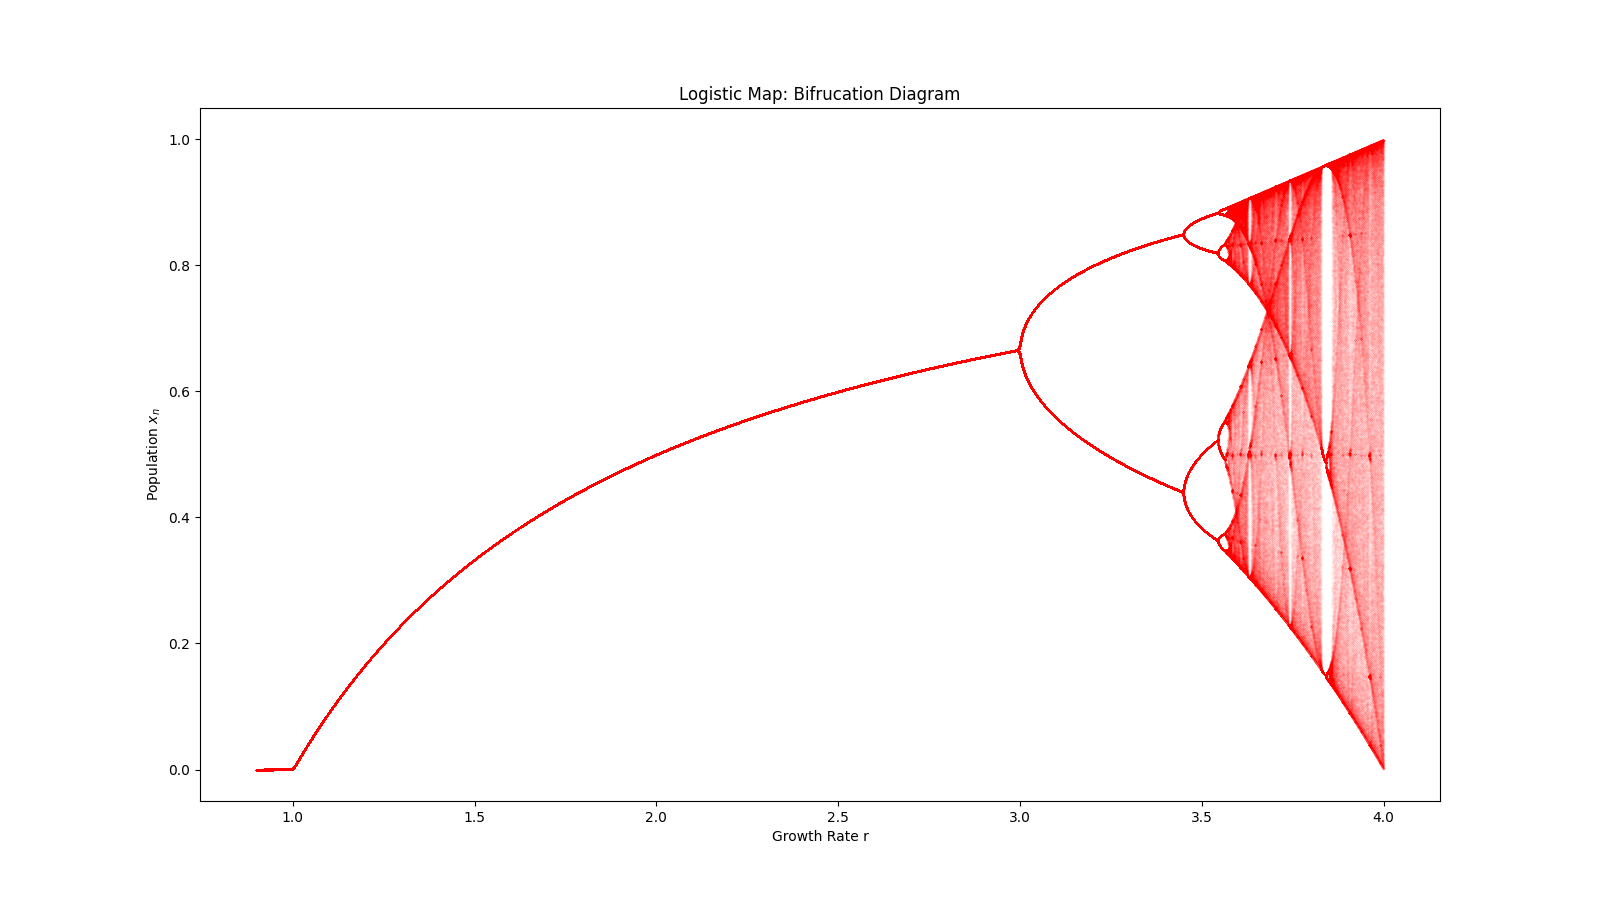

In [21]:
r_values = (0.9, 4)  # Range of r values
accuracy = 0.0001
reps = 600  # Number of repetitions
num_to_plot = 200
lims = np.zeros(reps)

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)

lims[0] = np.random.rand()
for r in np.arange(r_values[0], r_values[1], accuracy):
    for i in range(reps - 1):
        lims[i + 1] = r * lims[i] * (1 - lims[i])

    ax.plot([r] * num_to_plot, lims[reps - num_to_plot :], "r.", markersize=0.02)
ax.set(xlabel="Growth Rate r", ylabel="Population $x_n$", title="Logistic Map: Bifrucation Diagram")
plt.savefig('bif_diag.png') # Saving figure
plt.show()

This bifurcation diagram displays that everytime your plot it, it looks exactly the same. Past a certain $r$ value, the system becomes chaotic the population won't stabilise, hence all the various points for each $r$ value. This shows that a slight change in growth rate (initial condition) could have detrimental effects on the population values which appear during each time increment.  
This shows that for systems which seem to have no meaning and no patterns could have method in the madness, and could be deterministic. 

Thank you for taking the time to read my notebook.